## 1. Import libraries, test data and split into training/test data sets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## 2. Apply Feature scaling
This is minimize the feature value so that it'll not only be easier to work with and the data prediction comes out more accurately.

In [2]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 3. Training the Random Forest Classification model

In [3]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 25, criterion = 'gini', random_state = 0)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=0)

## 4a. Tabulate decision boundary

In [4]:
x_train_inverse = sc.inverse_transform(x_train)
x_test_inverse = sc.inverse_transform(x_test)
y_prediction = model.predict(x_test)

# Imagine calculus riemann sum delta
x1_delta = 0.5
x2_delta = 5

x1_margin = 10
x2_margin = 1000

x1, x2 = np.meshgrid(
    np.arange(start=x_train_inverse[:, 0].min() - x1_margin, stop=x_train_inverse[:, 0].max() + x1_margin, step=x1_delta),
    np.arange(start=x_train_inverse[:, 1].min() - x2_margin, stop=x_train_inverse[:, 1].max() + x2_margin, step=x2_delta)
)

z = model.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape)

## 4b. Display graph and details

The dots represents the entire data set and their actual predicted class. Green represents class `1` and red represents class `0`. The shaded areas of green and red are predicted areas that determines the data point classes. For test data, they are either circled with yellow (predicted `0`) and cyan (predicted `1`).

There is also the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) to get a sense of the accuracy  for the test data.

Metric:  gini
No of trees:  25
Feature importance: x1=0.482274300190245, x2=0.517725699809755

                Pred. Class 0  Pred. Class 1
Actual Class 0             63              5
Actual Class 1              4             28 

Accuracy score: 91.0%


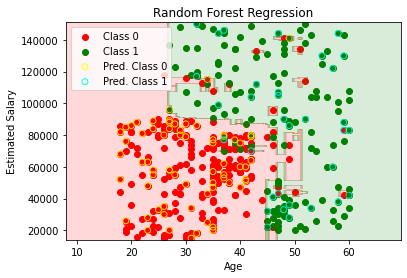

In [5]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score
from utils import split_into_classes
from itertools import product

x_0, x_1 = split_into_classes(x, y)
x_test_0, x_test_1 = split_into_classes(x_test_inverse, y_prediction)

cm = confusion_matrix(y_test, y_prediction)
algorithm_metric = model.get_params()["criterion"]
importance = model.feature_importances_
no_of_trees = model.get_params()["n_estimators"]

print('Metric: ', algorithm_metric)
print('No of trees: ', no_of_trees)
print(f'Feature importance: x1={importance[0]}, x2={importance[1]}\n')

print(pd.DataFrame(cm, columns=['Pred. Class 0', 'Pred. Class 1'], index=['Actual Class 0', 'Actual Class 1']), '\n')
print(f'Accuracy score: {accuracy_score(y_test, y_prediction) * 100}%')

plt.scatter(x_0['x'], x_0['y'], color='red', label='Class 0')
plt.scatter(x_1['x'], x_1['y'], color='green', label='Class 1')

plt.scatter(x_test_0['x'], x_test_0['y'], facecolors='none', edgecolors='yellow', label='Pred. Class 0')
plt.scatter(x_test_1['x'], x_test_1['y'], facecolors='none', edgecolors='cyan', label='Pred. Class 1')

plt.contourf(x1, x2, z, alpha = 0.15, cmap=ListedColormap(('red', 'green')))

plt.title('Random Forest Regression')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()